In [28]:
import zipfile
import PIL
from PIL import Image
from PIL import ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('Data/haarcascade_frontalface_default.xml')

In [29]:
def images(word,path):
    files = zipfile.ZipFile(path)
    filenames = files.namelist()
    for name in filenames:
        Imageslist = []
        file = files.open(name)
        img = cv.imdecode(np.frombuffer(file.read(),np.uint8),1)
        gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray,1.3,5)
        pil_img = Image.open(file).convert("RGB")
        text = pytesseract.image_to_string(pil_img)
        
        if word in text:
            for x,y,w,h in faces:
                Imageslist.append(pil_img.crop(box=(x,y,x+w,y+h)))
            print("Result found in file {}".format(name))
            
            if len(Imageslist)==0:
                print("But there were no faces in that file!")
            else:
                cs_width = 100
                cs_height = 100
                rows = int(np.ceil(len(Imageslist)/5))
                contact_sheet = PIL.Image.new(pil_img.mode,(cs_width*5,cs_height*rows))
                x=0
                y=0
                for img in Imageslist:
                    if img.width > cs_width:
                        img = img.resize((100,100))
                        contact_sheet.paste(img,(x,y))
                    else:
                        contact_sheet.paste(img,(x,y))
                    if x+img.width == contact_sheet.width:
                        x=0
                        y=y+img.height
                    else:
                        x=x+cs_width
                contact_sheet = contact_sheet.resize((int(contact_sheet.width), int(contact_sheet.height)))
                display(contact_sheet)

Result found in file a-0.png


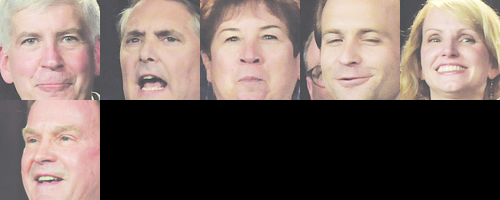

Result found in file a-3.png


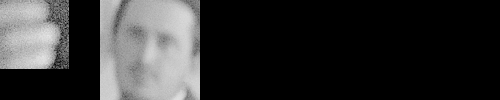

In [30]:
images("Christopher","small_img.zip")

Result found in file a-0.png


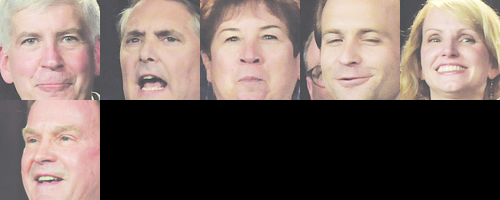

Result found in file a-1.png


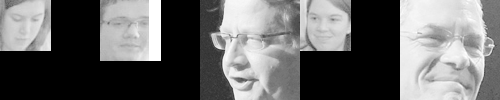

Result found in file a-10.png
But there were no faces in that file!
Result found in file a-13.png


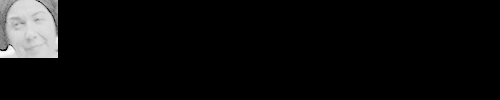

Result found in file a-2.png


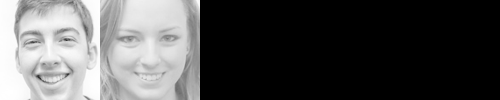

Result found in file a-3.png


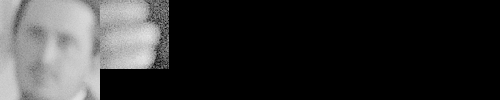

Result found in file a-8.png
But there were no faces in that file!


In [31]:
images("Mark","images.zip")